## Eksempel: Logistisk vekst.

La oss si at vi har en populasjon av bakterier, lakselus eller en annen organisme som vokser med tiden $t$.

La oss si at den totale vekten av populasjonen til tiden $t$ er git ved tallet $x(t)$.

La oss endelig anta at det er begrenset næring og plass slik at jo større organismen blir, jo langsomere vokser den.

En differensialligning som modellerer dette er logistisk vekst differensialligningen:

$$x'(t) = f(t, x(t)) = k \cdot x(t) \cdot (K - x(t)) = k\cdot K \cdot x(t) - k\cdot x(t)^2.$$

Her er $k$ og $K$ parametre som vi kanskje ikke kjenner.

Når $x(t)$ er nær $0$ kan vi se bort fra termen $k\cdot x(t)^2$, og vi får omtrent en eksponensiell vekst med vekstrate $k \cdot K$.
Derfor kalles også her tallet $k \cdot K$ **vekstraten** mens tallet $K$ er **kapasiteten** til systemet.

Bemerk at hvis $x(t) = K$, da blir $x'(t) = 0$, så $x(t) = K$ er en løsning til logistisk vekst differensialligningen. Vi vet også at for $x(t)$ nær $0$ vokser funksjonen $x(t)$ nærmest eksponensiellt.

### Eksakt løsning til logistisk vekst.

Differensialligningen

$$x'(t) = k \cdot x(t) \cdot (K - x(t))  \quad \text{med} \quad x(0) = x_0$$

har løsningen

$$x(t) = \frac{K\cdot x_0 \cdot e^{k\cdot K \cdot t}}{K + x_0 \cdot (e^{k \cdot K \cdot t} - 1)}$$

### Oppgave:

Modifiser koden over slik at den løser denne logistiske differensialligningen med
$k=1$, $K=10$ og $x_0 = 1$.

Tegn både retningsdiagram, tilnærmet løsning i tidsintervallet $[0,1]$ i fire steg, og eksakt løsning.

**Koden under anvender Eulers metode.**

In [1]:
import numpy as np

def eulers_metode(f, t0, x0, tn, n):
    """
    Bruker Eulers metode for å løse differensiallikningen x' = f(t, x).

    Args:
    f: Funksjonen som representerer høyresiden av differensiallikningen.
    t0: Startverdien for t.
    x0: Startverdien for x.
    tn: Siste verdi av t.
    n: Antall steg.

    Returns:
    To NumPy-arrayer:
    t: inneholder t-verdiene der x-verdiene er tilnærmet
    x: inneholder de tilnærmede x-verdiene for hvert steg.
    """
    # produserer t-verdiene t0, t1, ..., tn
    t_values = np.linspace(t0, tn, n + 1)
    # første x-verdi er x0
    x_values = [x0]
    # steglengden for t beregnes
    delta_t = t_values[1] - t_values[0]

    # for t0, t1, ..., t(n-1) beregner vi x-verdier
    for t_val in t_values[:-1]:
        # neste x-verdi er lik forrige x-verdi pluss steglengden gange
        # funksjonsverdien i paret bestående av forrige t-verdi og forrige x-verdi
        x_next = x_values[-1] + delta_t * f(t_val, x_values[-1])
        # legg den neste x-verdien til i listen av x-verdier
        x_values.append(x_next)

    return t_values, np.array(x_values)


In [28]:
# Sett startverdier og parametre

k = 1
K = 10

t0 =    # Første t-verdi
x0 =    # Første x-verdi
tn =    # Siste t-verdi
n =     # Antall steg

In [29]:
# Forteller python om funksjonen f(t, x) = k*x*(K-x)
def f(t, x):
  return k*x*(K-x)

In [30]:
# Anvend Eulers metode
t_values, x_values = eulers_metode(f, t0, x0, tn, n)

In [31]:
# Fortell python om den eksakte løsningen
# xx(t) = (K * x0 * np.exp(k * K *(t - t0))) / (K + x0 * (np.exp(k * K *(t - t0)) - 1))

def xx(t):
    return (K * x0 * np.exp(k * K *(t - t0))) / (K + x0 * (np.exp(k * K *(t - t0)) - 1))

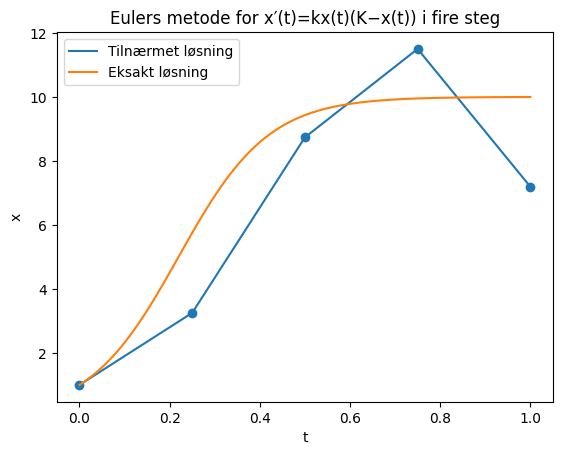

In [34]:
# Vi plotter resultatet, med prikker for tallene vi beregnet i Eulers metode
# sammen med den eksakte løsningen til diffligningen.

import matplotlib.pyplot as plt

plt.plot(t_values, x_values, label='Tilnærmet løsning')
plt.scatter(t_values, x_values)
t = np.linspace(t0, tn, 100)
plt.plot(t, xx(t), label='Eksakt løsning')
plt.xlabel('t')
plt.ylabel('x')
plt.legend(loc='upper left')
plt.title(r"Eulers metode for x′(t)=kx(t)(K−x(t)) i fire steg");

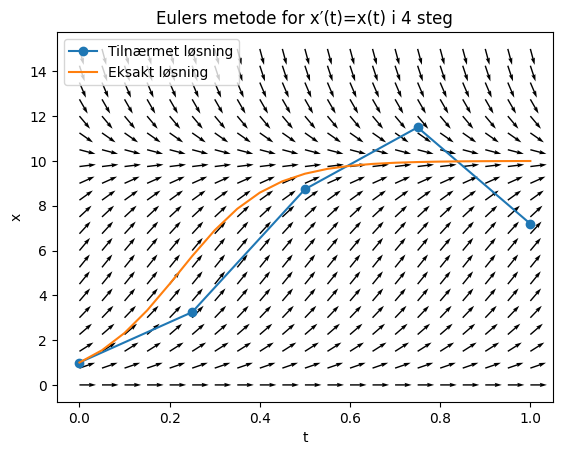

In [38]:
# @title Plot med retningsdiagram og steg av metoden til Euler
# Definer funksjonen y(x) = e^x
# Sett startverdier og parametre

k = 1
K = 10

t0 =0    # Første t-verdi
x0 = 1   # Første x-verdi
tn =1    # Siste t-verdi
n = 4    # Antall steg

N = 20 # Antall piler horisontalt

# Forteller python om funksjonen f(t, x) = k*x*(K-x)
def f(t, x):
  return k*x*(K-x)

# Anvend Eulers metode
t_values, x_values = eulers_metode(f, t0, x0, tn, n)

# Fortell python om den eksakte løsningen
# xx(t) = (K * x0 * np.exp(k * K *(t - t0))) / (K + x0 * (np.exp(k * K *(t - t0)) - 1))

def xx(t):
    return (K * x0 * np.exp(k * K *(t - t0))) / (K + x0 * (np.exp(k * K *(t - t0)) - 1))

# # Definerer t-verdiene for pilene
tt = np.linspace(0, tn, num=N+1)

# Lager et firkantet gitter av de oppgitte x- og y-verdiene
T, X = np.meshgrid(tt, x)

# Definerer f med hensyn på T og X
F = f(T, X)

# Definerer "steget" i x- og y-retning
dt = np.ones_like(T)
dx = F
r = (dt**2 + dx**2)**0.5

# plt.quiver tar for seg å lage alle tangentpilene [dt, dx] i alle punktene som opptrer i gitteret vi lagde.
plt.quiver(T, X, dt/r, dx/r, scale=30, scale_units='width', color='black', angles='xy')
# plt.quiver(T, X, dt/r, dx/r, scale=3.5, scale_units='width', color='black', angles='xy')
plt.plot(t_values, x_values, '-o', label=r'Tilnærmet løsning')

plt.plot(tt, xx(t), label=r'Eksakt løsning')
# plt.ylim((0, 50))
# plt.grid()
plt.xlabel('t')
plt.ylabel('x')
plt.legend(loc='upper left')
plt.title(r"Eulers metode for x′(t)=x(t) i " + f"{n} steg");